In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Importing the dataset

wine_quality = pd.read_csv('QualityPrediction.csv')

In [3]:
# Checking column type and if any null values are present
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Checking mean, median, percentiles, etc 
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


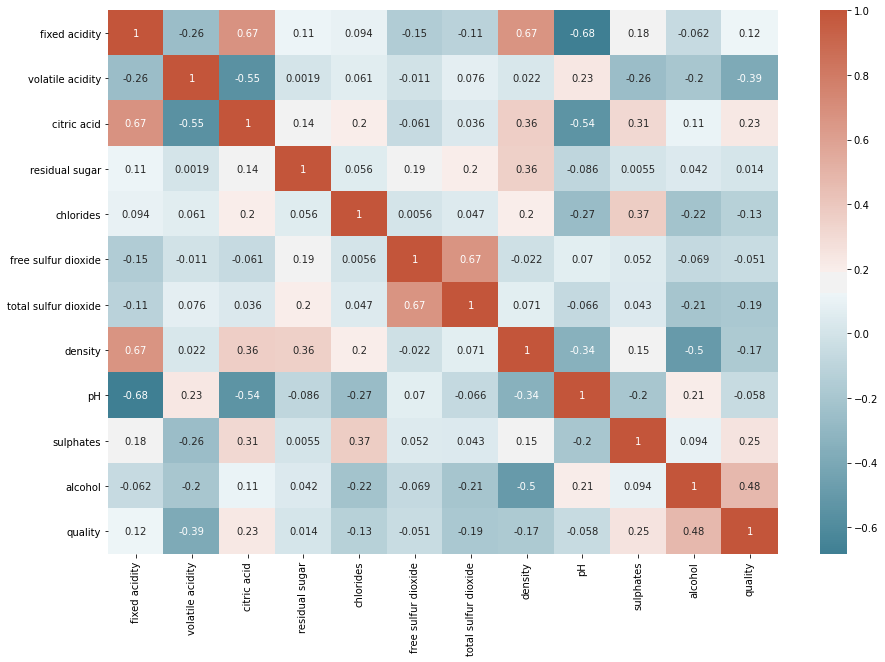

In [5]:
# Correlation Matrix
corr = wine_quality.corr()
plt.subplots(figsize = (15,10))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = sns.diverging_palette(220, 20, as_cmap = True))

In [6]:
# Normalizing using z-score
wine_quality_mean = wine_quality.mean()
wine_quality_std = wine_quality.std()
wine_quality_norm = (wine_quality - wine_quality_mean) / wine_quality_std

In [36]:
wine_quality_norm['quality_norm'] = (wine_quality_norm['quality'] > 1.5).astype(float)
wine_quality_norm['quality_norm']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1594    0.0
1595    0.0
1596    0.0
1597    0.0
1598    0.0
Name: quality_norm, Length: 1599, dtype: float64

In [37]:
wine_quality_norm['quality_norm'].value_counts()

0.0    1382
1.0     217
Name: quality_norm, dtype: int64

In [38]:
# Defining X and y 
feature_cols = ['alcohol', 'sulphates', 'citric acid']
X = wine_quality_norm[feature_cols]
y = wine_quality_norm['quality_norm']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [39]:
# Instantiating the model and fitting it to the training dataset
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [40]:
# Prediction on test dataset
y_pred = log_reg.predict(X_test)

In [41]:
# Accuracy, Precision and Recall

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))

Accuracy:  0.8625
Precision:  0.5714285714285714
Recall:  0.17391304347826086


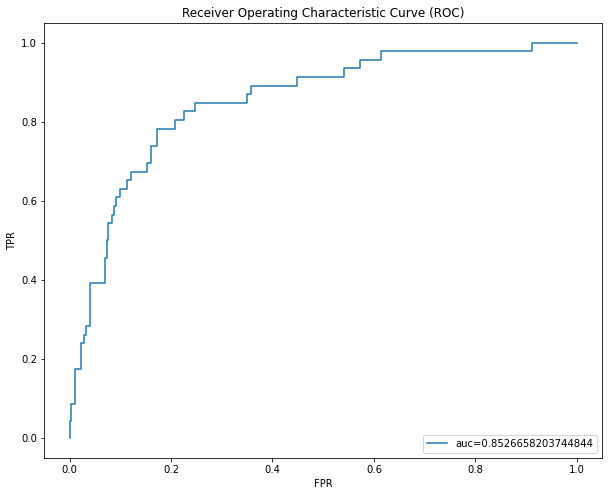

In [43]:
# ROC and AUC
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()